# Using PANDAS and SEABORN for exploratory data analysis: applications in agricultural research

## The DATA

Dataset that measures the **percent reduction** in horn fly counts by the application of pesticide ear-tags <br>

<img src="hornfly.jpg" width="200" height="200" align="center" style=float: left >  

8 pesticides grouped into 4 classes <br>

<img src="ear_tag_cow_list.png" width="500" height="400" align="center" style=float: left >

15 counties grouped into 2 regions <br>

<img src="texas.png" width="600" height="500" align="center" style=float: left >

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import Image
from openpyxl import load_workbook
from pandas import ExcelWriter
from pandas.api.types import CategoricalDtype

## Using PANDAS to import data into a dataframe

In [2]:
hf = pd.read_excel('final_hornfly_a.xlsx')

In [3]:
hf1 = pd.DataFrame(hf)

In [4]:
hf1.head(5)

,county,county_class,treatment,treatment_class,percentage.reduction
0,anderson,east,optimizer,organophosphate,32.551449
1,bowie,east,python,pyrethroid,79.647449
2,camp,east,gardstar,pyrethroid,26.270105
3,camp,east,magnum,pyrethroid,51.697729
4,camp,east,optimizer,organophosphate,-3.778404


#### Setting Columns as Categorical Variables

In [5]:
hf1['treatment_class'] = pd.Categorical(hf1.treatment_class)

In [6]:
hf1['county_class'] = pd.Categorical(hf1.county_class)

#### Creating a new dataframe with columns of interest

In [7]:
hf2 = hf1[['county_class', 'treatment_class', 'percentage.reduction']]

In [8]:
hf2.head(6)

,county_class,treatment_class,percentage.reduction
0,east,organophosphate,32.551449
1,east,pyrethroid,79.647449
2,east,pyrethroid,26.270105
3,east,pyrethroid,51.697729
4,east,organophosphate,-3.778404
5,east,vetgun,59.992575


## SEABORN for Data Visualization
#### Colors are fun and help visualize data better

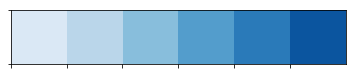

In [9]:
sns.palplot(sns.color_palette("Blues"))

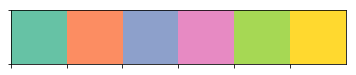

In [10]:
sns.palplot(sns.color_palette("Set2"))

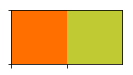

In [11]:
pal2 = ["#FF6F00", "#C0CA33"]
sns.set_palette(pal2)
sns.palplot(sns.color_palette())

#### Using SEABORN to make boxplots:
-  Factorplot
-  Boxplot

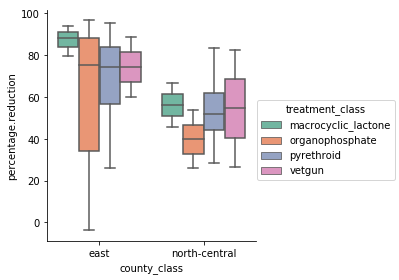

In [12]:
##### Using seaborn factorplot
##### Most common for categorical variable comparisons

f = sns.factorplot(data = hf2,
                   x = 'county_class',
                   y = 'percentage.reduction',
                   kind = 'box', 
                   hue = 'treatment_class',
                   order = ['east',
                                'north-central'],
                   palette= 'Set2')

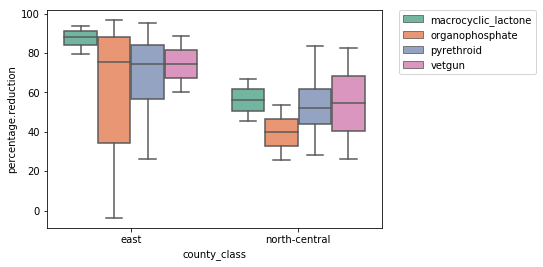

In [13]:
##### Using seaborn boxplot

e = sns.boxplot(x="county_class", 
                y="percentage.reduction", 
                hue="treatment_class", 
                data=hf2, 
                palette="Set2")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<font color='red'>There is an outlier</font>

## Back to PANDAS for Data Wrangling
#### Outlier removal using PANDAS df.drop

In [14]:
hf3 = hf2.drop(hf2.index[4])

## Back to SEABORN for Data Visualization
#### Make a SEABORN boxplot without the outlier

[(0, 100.156503)]

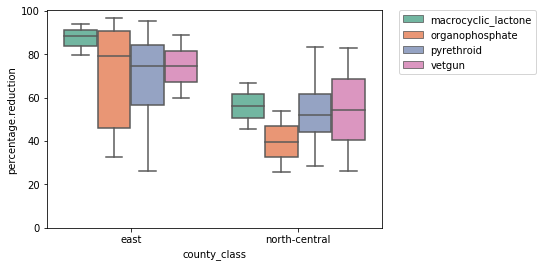

In [15]:
#### Grouping by County Region
h = sns.boxplot(x="county_class", 
                y="percentage.reduction", 
                hue="treatment_class", 
                data=hf3, palette="Set2")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

h.set(ylim=(0, None))

### Change Visualization
#### Boxplot by Treatment Class: changing the 'hue'

[Text(0,0,'macrocyclic_lactone'),
 Text(1,0,'organophosphate'),
 Text(2,0,'pyrethroid'),
 Text(3,0,'vetgun')]

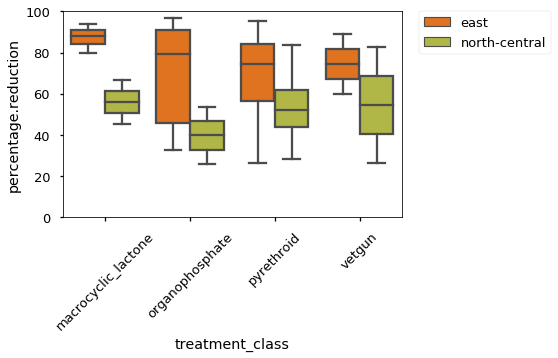

In [16]:
#### Grouping by Treatment Class

sns.set_context("talk")
sns.set_palette(pal2)
j = sns.boxplot(x="treatment_class", 
                y="percentage.reduction", 
                hue="county_class", 
                data=hf3)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
j.set(ylim=(0, None))
j.set_xticklabels(j.get_xticklabels(),rotation=45)

### Change the display of the graph based on 'CONTEXT'
-  Poster
-  Talk

In [17]:
sns.set_context("poster")
sns.set_palette(pal2)

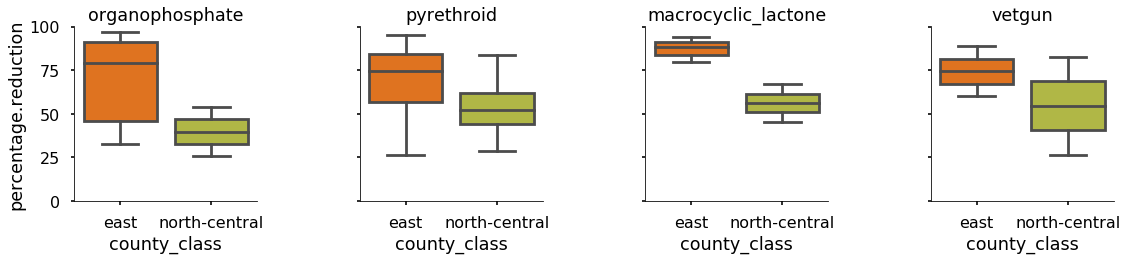

In [18]:
a = sns.factorplot(data = hf3,
                   x = 'county_class',
                   y = 'percentage.reduction',
                   kind = 'box', 
                   col = 'treatment_class',
                   col_order = ['organophosphate',
                                'pyrethroid',
                                'macrocyclic_lactone',
                                'vetgun']).set_titles('{col_name}')

a.set(ylim=(0, None))

In [19]:
sns.set_context("talk")
sns.set_palette(pal2)

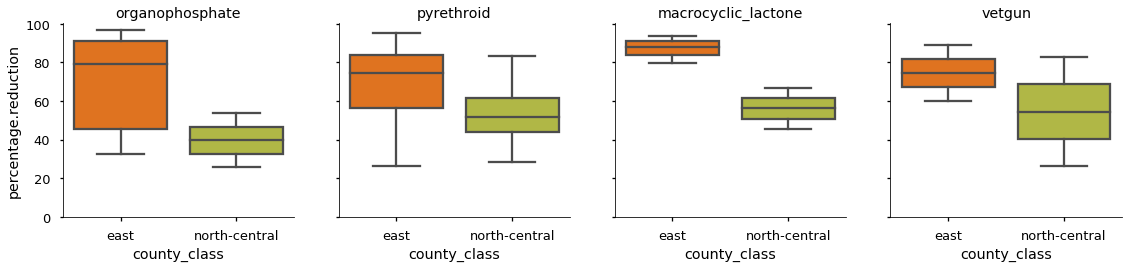

In [20]:
c = sns.factorplot(data = hf3,
                   x = 'county_class',
                   y = 'percentage.reduction',
                   kind = 'box', 
                   col = 'treatment_class',
                   col_order = ['organophosphate',
                                'pyrethroid',
                                'macrocyclic_lactone',
                                'vetgun']).set_titles('{col_name}')

c.set(ylim=(0, None))